In [1]:
import madx.optics_parameters as mop
import madx.madx_configuration as mc
import approximator.optics_parameters as aop
import approximator.runner as ap_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import ROOT
from ROOT import gSystem, gInterpreter
import data.bunch_configuration as buc

sns.set_style("whitegrid")

Welcome to JupyROOT 6.16/00


In [2]:
sys.path.append("/home/rafalmucha/Pobrane/optic/optics_generator_python/src")
path_to_configuration = "/home/rafalmucha/Pobrane/optic/2016/"
path_to_xml_file = "/home/rafalmucha/Pobrane/optic/2016/configuration_reconst_beam1.xml"
item_number = 0
madx_configuration = mc.MadxConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [3]:
home = "/home/rafalmucha/Pobrane/optic/"
file_name = "parametrization_6500GeV_0p4_185_reco"
approximator_name = "ip5_to_station_150_h_2_lhcb1"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/2016/" + file_name + ".root"

In [4]:
approximator = ap_runner.get_approximator(path_to_project, path_to_file, approximator_name)

Error in <TCling::RegisterModule>: cannot find dictionary module FitCint_rdict.pcm


In [5]:
home = "/home/rafalmucha/Pobrane/optic/"
file_name = "parametrization_6500GeV_0p4_185_reco_b1"
approximator_name = "ip5_to_station_150_h_2_lhcb1"
path_to_project = home+"/optics_generator_python"
path_to_file = "/home/rafalmucha/" + file_name + ".root"
approximator_vale = ap_runner.get_approximator(path_to_project, path_to_file, approximator_name)

input_line_54:2:9: error: redefinition of 'f'
 TFile *f=TFile::Open("/home/rafalmucha/parametrization_6500GeV_0p4_185_...
        ^
input_line_37:2:9: note: previous definition is here
 TFile *f=TFile::Open("/home/rafalmucha/Pobrane/optic//2016/parametrizat...
        ^
input_line_55:2:39: error: redefinition of 'apr'
 std::auto_ptr<LHCOpticsApproximator> apr = std::auto_ptr<LHCOpticsAppro...
                                      ^
input_line_49:2:39: note: previous definition is here
 std::auto_ptr<LHCOpticsApproximator> apr = std::auto_ptr<LHCOpticsAppro...
                                      ^
input_line_57:2:9: error: redefinition of 'input'
 double input[5];
        ^
input_line_51:2:9: note: previous definition is here
 double input[5];
        ^
input_line_58:2:9: error: redefinition of 'output'
 double output[5];
        ^
input_line_52:2:9: note: previous definition is here
 double output[5];
        ^


In [6]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 4e-3
theta_x_mean = 0.000
sigma_theta_x = 1.3e-3
y_mean = 0.0
sigma_y = 4e-3
theta_y_mean = 0.00
sigma_theta_y = 1.3e-3
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 10000

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

home = "/home/rafalmucha/Pobrane/optic/optics_generator_python/"

import models.train_model as tram
import models.approximator as ma
approximators = tram.train(bunch_configuration, madx_configuration, home)
prototype_approximator = ma.Approximator(approximators)

Name: multidimfit Title: Multi-dimensional fit object
Name: multidimfit Title: Multi-dimensional fit object
Name: multidimfit Title: Multi-dimensional fit object
Name: multidimfit Title: Multi-dimensional fit object


input_line_59:2:9: error: redefinition of 'input'
 double input[5];
        ^
input_line_51:2:9: note: previous definition is here
 double input[5];
        ^
input_line_60:2:9: error: redefinition of 'output'
 double output[5];
        ^
input_line_52:2:9: note: previous definition is here
 double output[5];
        ^


In [7]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0.0
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0
pt_mean = -0.075
sigma_pt = 0.075

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 100

In [8]:
subtitle = file_name + "\n" + approximator_name
plot_size = 5
grid_x_resolution = 5
grid_y_resolution = 7

In [9]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

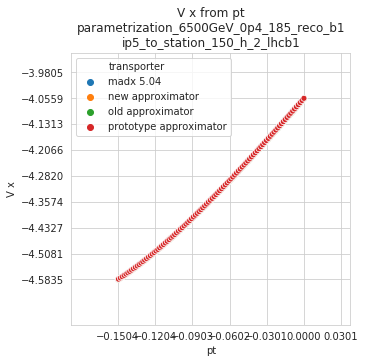

In [10]:
transporters = {
    "madx 5.04": (mop.compute_v_x, madx_configuration),
    "new approximator": (aop.compute_v_x, approximator),
    "old approximator": (aop.compute_v_x, approximator_vale),
    "prototype approximator": (aop.compute_v_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "V x", subtitle)

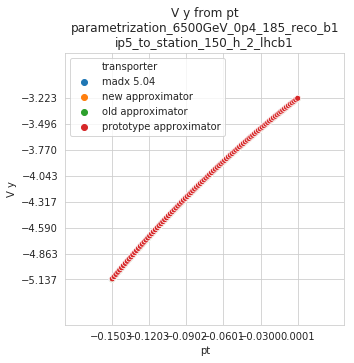

In [16]:
transporters = {
    "madx 5.04": (mop.compute_v_y, madx_configuration),
    "new approximator": (aop.compute_v_y, approximator),
    "old approximator": (aop.compute_v_y, approximator_vale),
    "prototype approximator": (aop.compute_v_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "V y", subtitle)

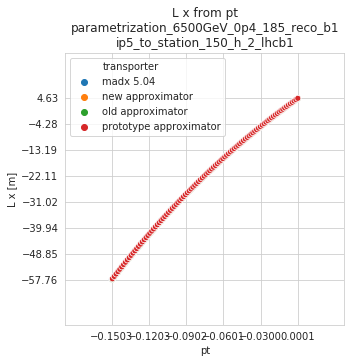

In [17]:
transporters = {
    "madx 5.04": (mop.compute_l_x, madx_configuration),
    "new approximator": (aop.compute_l_x, approximator),
    "old approximator": (aop.compute_l_x, approximator_vale),
    "prototype approximator": (aop.compute_l_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "L x", subtitle, y_unit=" [m]")

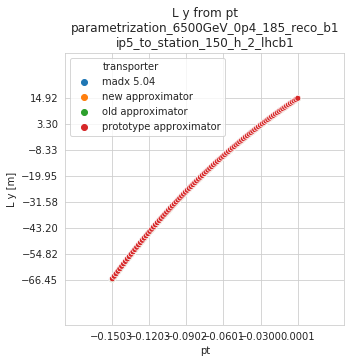

In [18]:
transporters = {
    "madx 5.04": (mop.compute_l_y, madx_configuration),
    "new approximator": (aop.compute_l_y, approximator),
    "old approximator": (aop.compute_l_y, approximator_vale),
    "prototype approximator": (aop.compute_l_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "L y", subtitle, y_unit=" [m]")

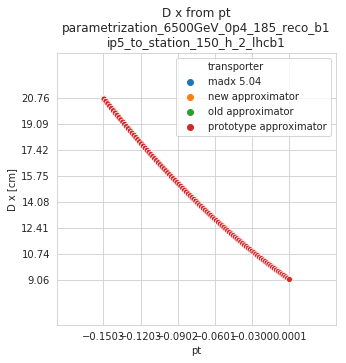

In [19]:
transporters = {
    "madx 5.04": (mop.compute_d_x, madx_configuration),
    "new approximator": (aop.compute_d_x, approximator),
    "old approximator": (aop.compute_d_x, approximator_vale),
    "prototype approximator": (aop.compute_d_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "D x", subtitle, y_unit=" [cm]", y_unit_multiplier=100)

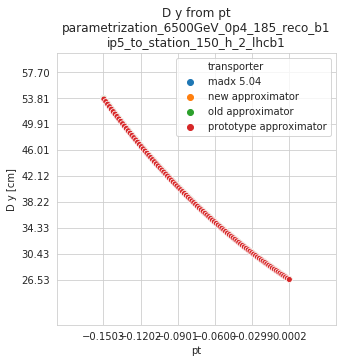

In [20]:
transporters = {
    "madx 5.04": (mop.compute_d_y, madx_configuration),
    "new approximator": (aop.compute_d_y, approximator),
    "old approximator": (aop.compute_d_y, approximator_vale),
    "prototype approximator": (aop.compute_d_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, "pt", "D y", subtitle, y_unit=" [cm]", y_unit_multiplier=100)